In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

1


<function matplotlib.pyplot.show(*args, **kw)>

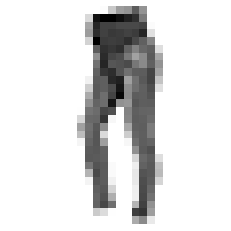

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import time

num = random.randint(0,60000)
print(y_train[num])
temp = X_train[num]

plt.imshow(temp.reshape(28, 28), cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show

#### First try, multiclassification.

In [5]:
X_train, X_test = X_train.reshape(60000, 784), X_test.reshape(10000, 784)

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

clf1 = SGDClassifier(random_state = 42)
clf1.fit(X_train, y_train)

y_pred1 = cross_val_score(clf1, X_train, y_train, cv=3, scoring="accuracy")
y_pred1

array([0.78315, 0.81355, 0.82255])

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

y_train_pred1 = cross_val_predict(clf1, X_train, y_train, cv=3)

conf1 = confusion_matrix(y_train, y_train_pred1)
conf1

array([[4606,   23,  184,  356,  158,    5,  542,    1,  120,    5],
       [  25, 5682,   46,  158,   56,    0,   22,    0,    8,    3],
       [  56,   11, 4101,   57, 1379,    1,  332,    0,   63,    0],
       [ 222,   68,  109, 5068,  344,    1,  126,    4,   49,    9],
       [  20,    4,  602,  208, 4950,    0,  172,    0,   43,    1],
       [  14,    9,    9,   24,    9, 5320,   18,  274,  121,  202],
       [ 774,   19,  916,  300, 1467,    1, 2351,    1,  168,    3],
       [   1,    0,    0,    5,    1,  449,    1, 5364,   28,  151],
       [  31,    3,   47,   62,   75,   55,   95,   25, 5601,    6],
       [   2,    2,    2,    5,    2,  316,    7,  301,   21, 5342]],
      dtype=int64)

#### An accuracy of about 80%. not bad but lets try reducing the amount of dimensions.

In [8]:
df = pd.DataFrame(X_train).transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0,0,0,0,167,0,237,0,0,...,77,0,0,0,0,0,0,0,1,0
780,0,0,0,0,0,73,0,231,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,70,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
zeros = (df == 0).sum(axis=1)
zero_percent = zeros/60000
zero_percent

0      0.999783
1      0.997933
2      0.987750
3      0.976317
4      0.964767
         ...   
779    0.772500
780    0.859683
781    0.951967
782    0.981700
783    0.996233
Length: 784, dtype: float64

In [10]:
(zero_percent > 0.8).sum()

169

In [11]:
new_df = df.drop(df[zero_percent > 0.8].index, axis=0).transpose()
new_df

,9,10,11,12,13,14,15,16,17,18,...,770,771,772,773,774,775,776,777,778,779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,41,188,103,54,48,43,87,168,133,...,125,124,125,121,119,114,130,76,0,0
2,22,118,24,0,0,0,0,0,48,88,...,57,56,32,8,0,0,1,0,0,0
3,96,175,156,64,14,54,137,204,194,102,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,26,0,...,0,139,161,74,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,15,131,87,95,97,106,95,115,109,...,0,0,160,80,0,0,0,0,0,0
59997,5,15,0,0,0,0,0,0,39,0,...,223,209,201,56,0,0,0,0,0,0
59998,0,17,191,159,79,85,158,191,23,0,...,66,63,66,69,66,54,50,5,0,1


In [12]:
clf2 = SGDClassifier(random_state = 42)
clf2.fit(new_df, y_train)

y_pred2 = cross_val_score(clf2, new_df, y_train, cv=3, scoring="accuracy")
y_pred2

array([0.821 , 0.8148, 0.8011])

In [13]:
y_train_pred2 = cross_val_predict(clf2, new_df, y_train, cv=3)

conf2 = confusion_matrix(y_train, y_train_pred2)
conf2

array([[4996,   59,  169,  260,   88,    5,  330,    1,   84,    8],
       [  20, 5762,   69,  106,   25,    0,    7,    1,    6,    4],
       [  92,   20, 4571,   46,  911,    2,  286,    0,   72,    0],
       [ 343,  172,  174, 4821,  330,    1,  112,    7,   27,   13],
       [  29,   21,  696,  212, 4727,    0,  281,    0,   32,    2],
       [  16,    8,   20,   11,    4, 5059,   17,  361,  176,  328],
       [1185,   36, 1095,  204, 1132,    1, 2206,    0,  138,    3],
       [   0,    3,    0,    2,    0,  167,    1, 5476,   38,  313],
       [  68,    4,   79,   61,  102,   52,   98,   39, 5484,   13],
       [   4,    2,    3,    1,    2,   97,    0,  248,    7, 5636]],
      dtype=int64)

#### After removing rows that have more than 80% white pixels, there is a slight improvement. about a little more than 80% accuracy now.

#### Now, lets turn every pixel with a value of 100 and above to "1", and everything else to a "0", making the dataset binary.

In [14]:
binary_df = new_df.copy().transpose()
binary_df[binary_df <= 100] = 0
binary_df[binary_df > 100] = 1
binary_df

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,0,1,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
12,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
13,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
778,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
clf3 = SGDClassifier(random_state = 42)
clf3.fit(binary_df.transpose(), y_train)

y_pred3 = cross_val_score(clf3, binary_df.transpose(), y_train, cv=3, scoring="accuracy")
y_pred3

array([0.8027 , 0.79945, 0.7777 ])

In [16]:
y_train_pred3 = cross_val_predict(clf3, new_df, y_train, cv=3)

conf3 = confusion_matrix(y_train, y_train_pred3)
conf3

array([[4996,   59,  169,  260,   88,    5,  330,    1,   84,    8],
       [  20, 5762,   69,  106,   25,    0,    7,    1,    6,    4],
       [  92,   20, 4571,   46,  911,    2,  286,    0,   72,    0],
       [ 343,  172,  174, 4821,  330,    1,  112,    7,   27,   13],
       [  29,   21,  696,  212, 4727,    0,  281,    0,   32,    2],
       [  16,    8,   20,   11,    4, 5059,   17,  361,  176,  328],
       [1185,   36, 1095,  204, 1132,    1, 2206,    0,  138,    3],
       [   0,    3,    0,    2,    0,  167,    1, 5476,   38,  313],
       [  68,    4,   79,   61,  102,   52,   98,   39, 5484,   13],
       [   4,    2,    3,    1,    2,   97,    0,  248,    7, 5636]],
      dtype=int64)

#### Still about the same. now let's scale the data and use PCA.

In [17]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(pd.DataFrame(X_train))

MinMaxScaler()

In [18]:
df_scaled = scaler.transform(pd.DataFrame(X_train))
df_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
from sklearn.decomposition import PCA

clf4 = SGDClassifier(random_state = 42)

#### After some tries, I have found out that the best number of components is between 100 and 200.

In [23]:
maxn = 0
maxi = 0

i = 100
while i <= 200:
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    X_pca=pca.transform(df_scaled)
    clf4.fit(X_pca, y_train)
    current = cross_val_score(clf4, X_pca, y_train, cv=3, scoring="accuracy").max()
    if maxn <= current:
        maxn = current
        maxi = i
    i += 1

print(maxn)
print(maxi)

0.8431
194


In [24]:
pca = PCA(n_components=194)
pca.fit(df_scaled)
X_pca=pca.transform(df_scaled)
clf4.fit(X_pca, y_train)
y_pred4 = cross_val_score(clf4, X_pca, y_train, cv=3, scoring="accuracy")
y_pred4

array([0.8356 , 0.84175, 0.8407 ])

In [25]:
y_train_pred4 = cross_val_predict(clf4, df_scaled, y_train, cv=3)

conf4 = confusion_matrix(y_train, y_train_pred4)
conf4

array([[4999,   24,   91,  313,   32,   12,  444,    1,   83,    1],
       [  20, 5788,   19,  136,   12,    1,   20,    1,    3,    0],
       [ 115,    9, 4533,   67,  688,    6,  520,    0,   62,    0],
       [ 222,   85,   62, 5246,  205,    2,  156,    1,   21,    0],
       [  21,   15,  619,  285, 4394,    1,  581,    0,   83,    1],
       [   8,    4,    7,    9,    1, 5574,    8,  231,   64,   94],
       [1017,   20,  691,  240,  559,    4, 3334,    1,  132,    2],
       [   0,    0,    0,    1,    0,  295,    3, 5411,   17,  273],
       [  51,    2,   41,   56,   36,   63,  115,   23, 5596,   17],
       [   4,    1,    1,    4,    1,  171,   14,  198,   11, 5595]],
      dtype=int64)

#### This is much better an accuracy of 84%. Let's try now XGBoost.

In [26]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_pca)
print(explained_variance_score(predictions,y_train))

0.8795797824859619


#### Accuracy of 88%.